In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import load_diabetes
import keras
import matplotlib.pyplot as plt

# Data Preprocessing

In [64]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

# Build Model

In [68]:
model_cls = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


Training model with optimizer: sgd


5/5 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7532
Test accuracy with sgd optimizer: 0.7532467246055603


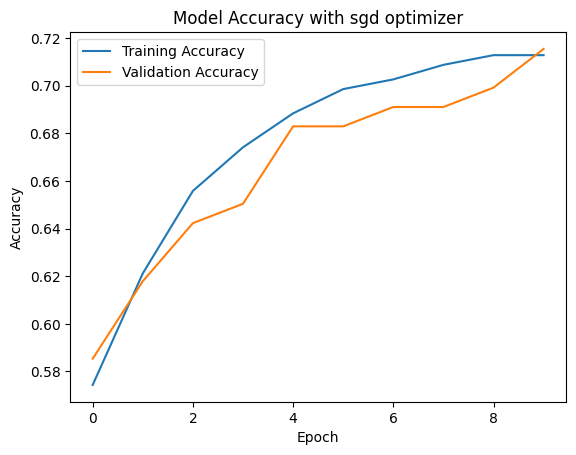


Training model with optimizer: adam
5/5 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7922
Test accuracy with adam optimizer: 0.7922077775001526


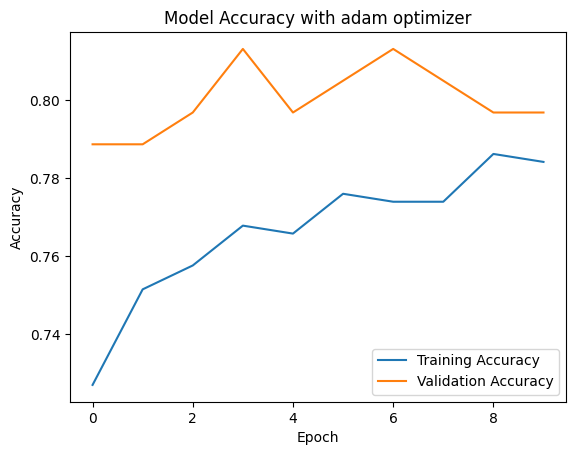


Training model with optimizer: rmsprop
5/5 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7922
Test accuracy with rmsprop optimizer: 0.7922077775001526


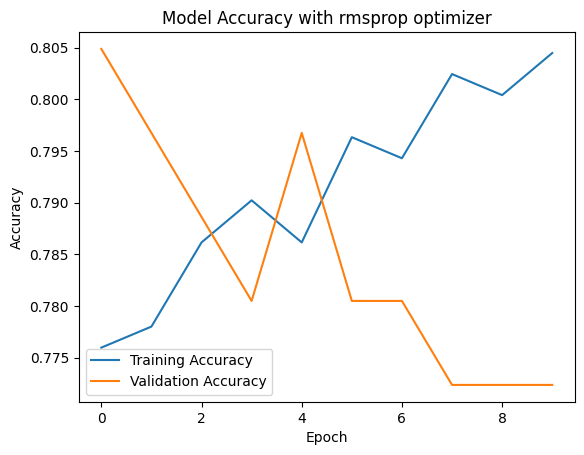


Training model with optimizer: adagrad
5/5 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8052
Test accuracy with adagrad optimizer: 0.8051947951316833


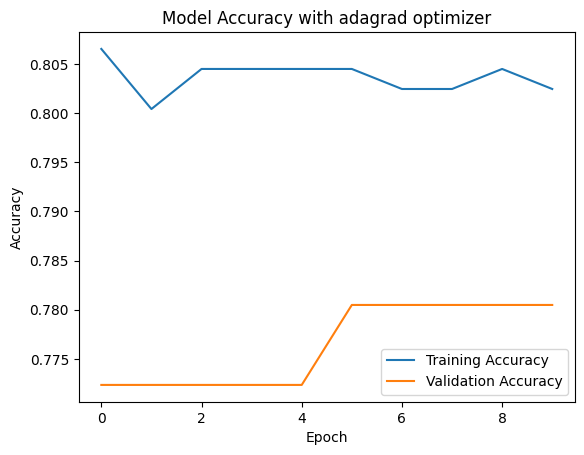


Training model with optimizer: adadelta
5/5 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8052
Test accuracy with adadelta optimizer: 0.8051947951316833


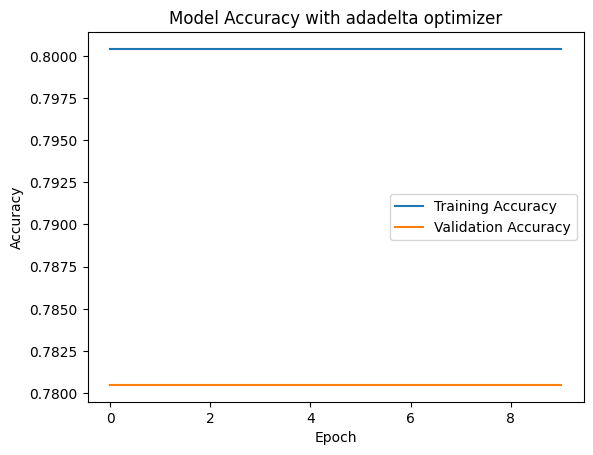

In [69]:
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']

# Train and evaluate models for each optimizer
for optimizer in optimizers:
    print(f"\nTraining model with optimizer: {optimizer}")
    
    # Compile the model with the specified optimizer
    model_cls.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model_cls.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    test_loss_cls, test_acc_cls = model_cls.evaluate(X_test, y_test)
    print(f'Test accuracy with {optimizer} optimizer: {test_acc_cls}')

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy with {optimizer} optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Another Example

In [70]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import keras

X_cls, y_cls = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

scaler_cls = StandardScaler()
X_train_cls = scaler_cls.fit_transform(X_train_cls)
X_test_cls = scaler_cls.transform(X_test_cls)

model_cls = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train_cls.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

optimizers = ['sgd', 'adam', 'rmsprop']
for optimizer in optimizers:
    model_cls.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    print(f"\nTraining model with optimizer: {optimizer}")

    model_cls.fit(X_train_cls, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

    test_loss_cls, test_acc_cls = model_cls.evaluate(X_test_cls, y_test_cls)
    print(f'Test accuracy: {test_acc_cls}')


Training model with optimizer: sgd
Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 0.7980 - accuracy: 0.4797 - val_loss: 0.7526 - val_accuracy: 0.4688
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.4922 - val_loss: 0.7023 - val_accuracy: 0.4875
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5188 - val_loss: 0.6686 - val_accuracy: 0.5562
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.5891 - val_loss: 0.6425 - val_accuracy: 0.6812
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.6500 - val_loss: 0.6207 - val_accuracy: 0.7063
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6875 - val_loss: 0.6013 - val_accuracy: 0.7500
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7188 - val_loss: 0.5835 - val_a